In [1]:
from fastai.vision import *
from fastai.basics import *

## oblocheck testing with transfer learning and model resnet50

In [2]:
os.getcwd()

'/home/jupyter/tutorials/fastai/course-v3/nbs/dl1'

In [3]:
path=Path('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/oblo')
path

PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/oblo')

In [4]:
path.ls()

[PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/oblo/buoni'),
 PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/oblo/rotti'),
 PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/oblo/.ipynb_checkpoints')]

In [5]:
classes=['buoni','rotti']
classes

['buoni', 'rotti']

In [6]:
np.random.seed(42)

In [7]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [8]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, size=224, num_workers=16)

In [9]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (462 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
buoni,buoni,buoni,buoni,buoni
Path: /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/oblo;

Valid: LabelList (115 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
buoni,rotti,rotti,buoni,rotti
Path: /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/oblo;

Test: None

In [10]:
data.classes

['buoni', 'rotti']

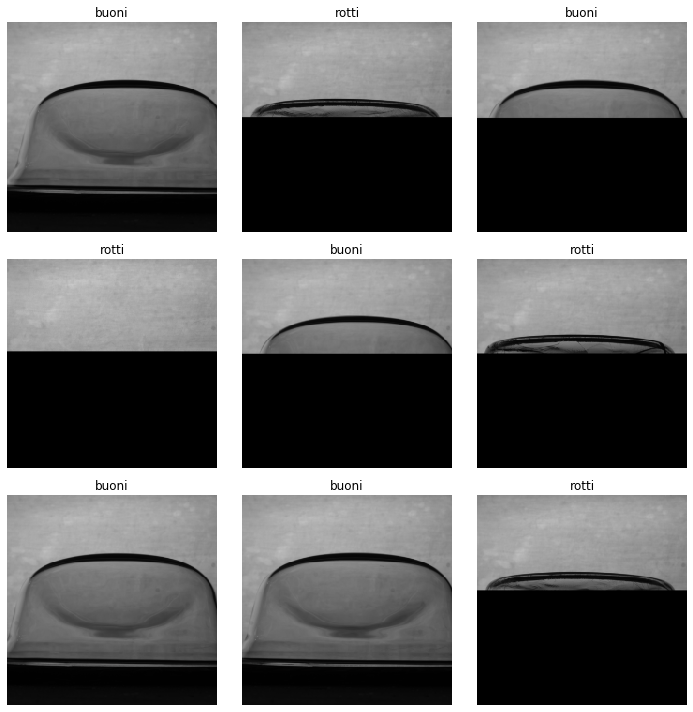

In [11]:
data.show_batch(rows=3, figsize=(10,10))

**We don't build from scrach the model, but we use cnn_learner from fastai which creates a CNN and model resnet50**
The cnn_learner factory method helps to automatically get a pretrained model from a given architecture

## Train model:

In [12]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [13]:
learn.fit_one_cycle(4) #fit the parameters/weights with SGD. Not so bad results!

In [14]:
learn.save('stage-1')

In [15]:
learn.unfreeze() #Unfreeze entire model.
#Sets every layer group to trainable.

In [16]:
learn.lr_find() #find the learning rate

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [18]:
learn.fit_one_cycle(4, max_lr=slice(3e-4,3e-3)) #try the learning rate to be in this range from default
#good result value in fastai, and it seems to works, we have better result error rate!But it need a second
#thought and correction.

In [19]:
learn.save('stage-2')

In [20]:
interp = ClassificationInterpretation.from_learner(learn)

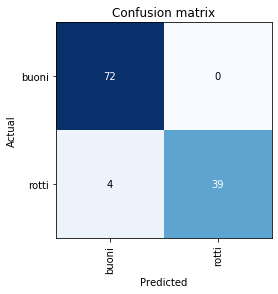

In [21]:
 interp.plot_confusion_matrix() #do the confusion matrix.

Test it for an image that it never saw:

In [22]:
learn.export() #without export I have to reload everything that I done. Export does it for us!

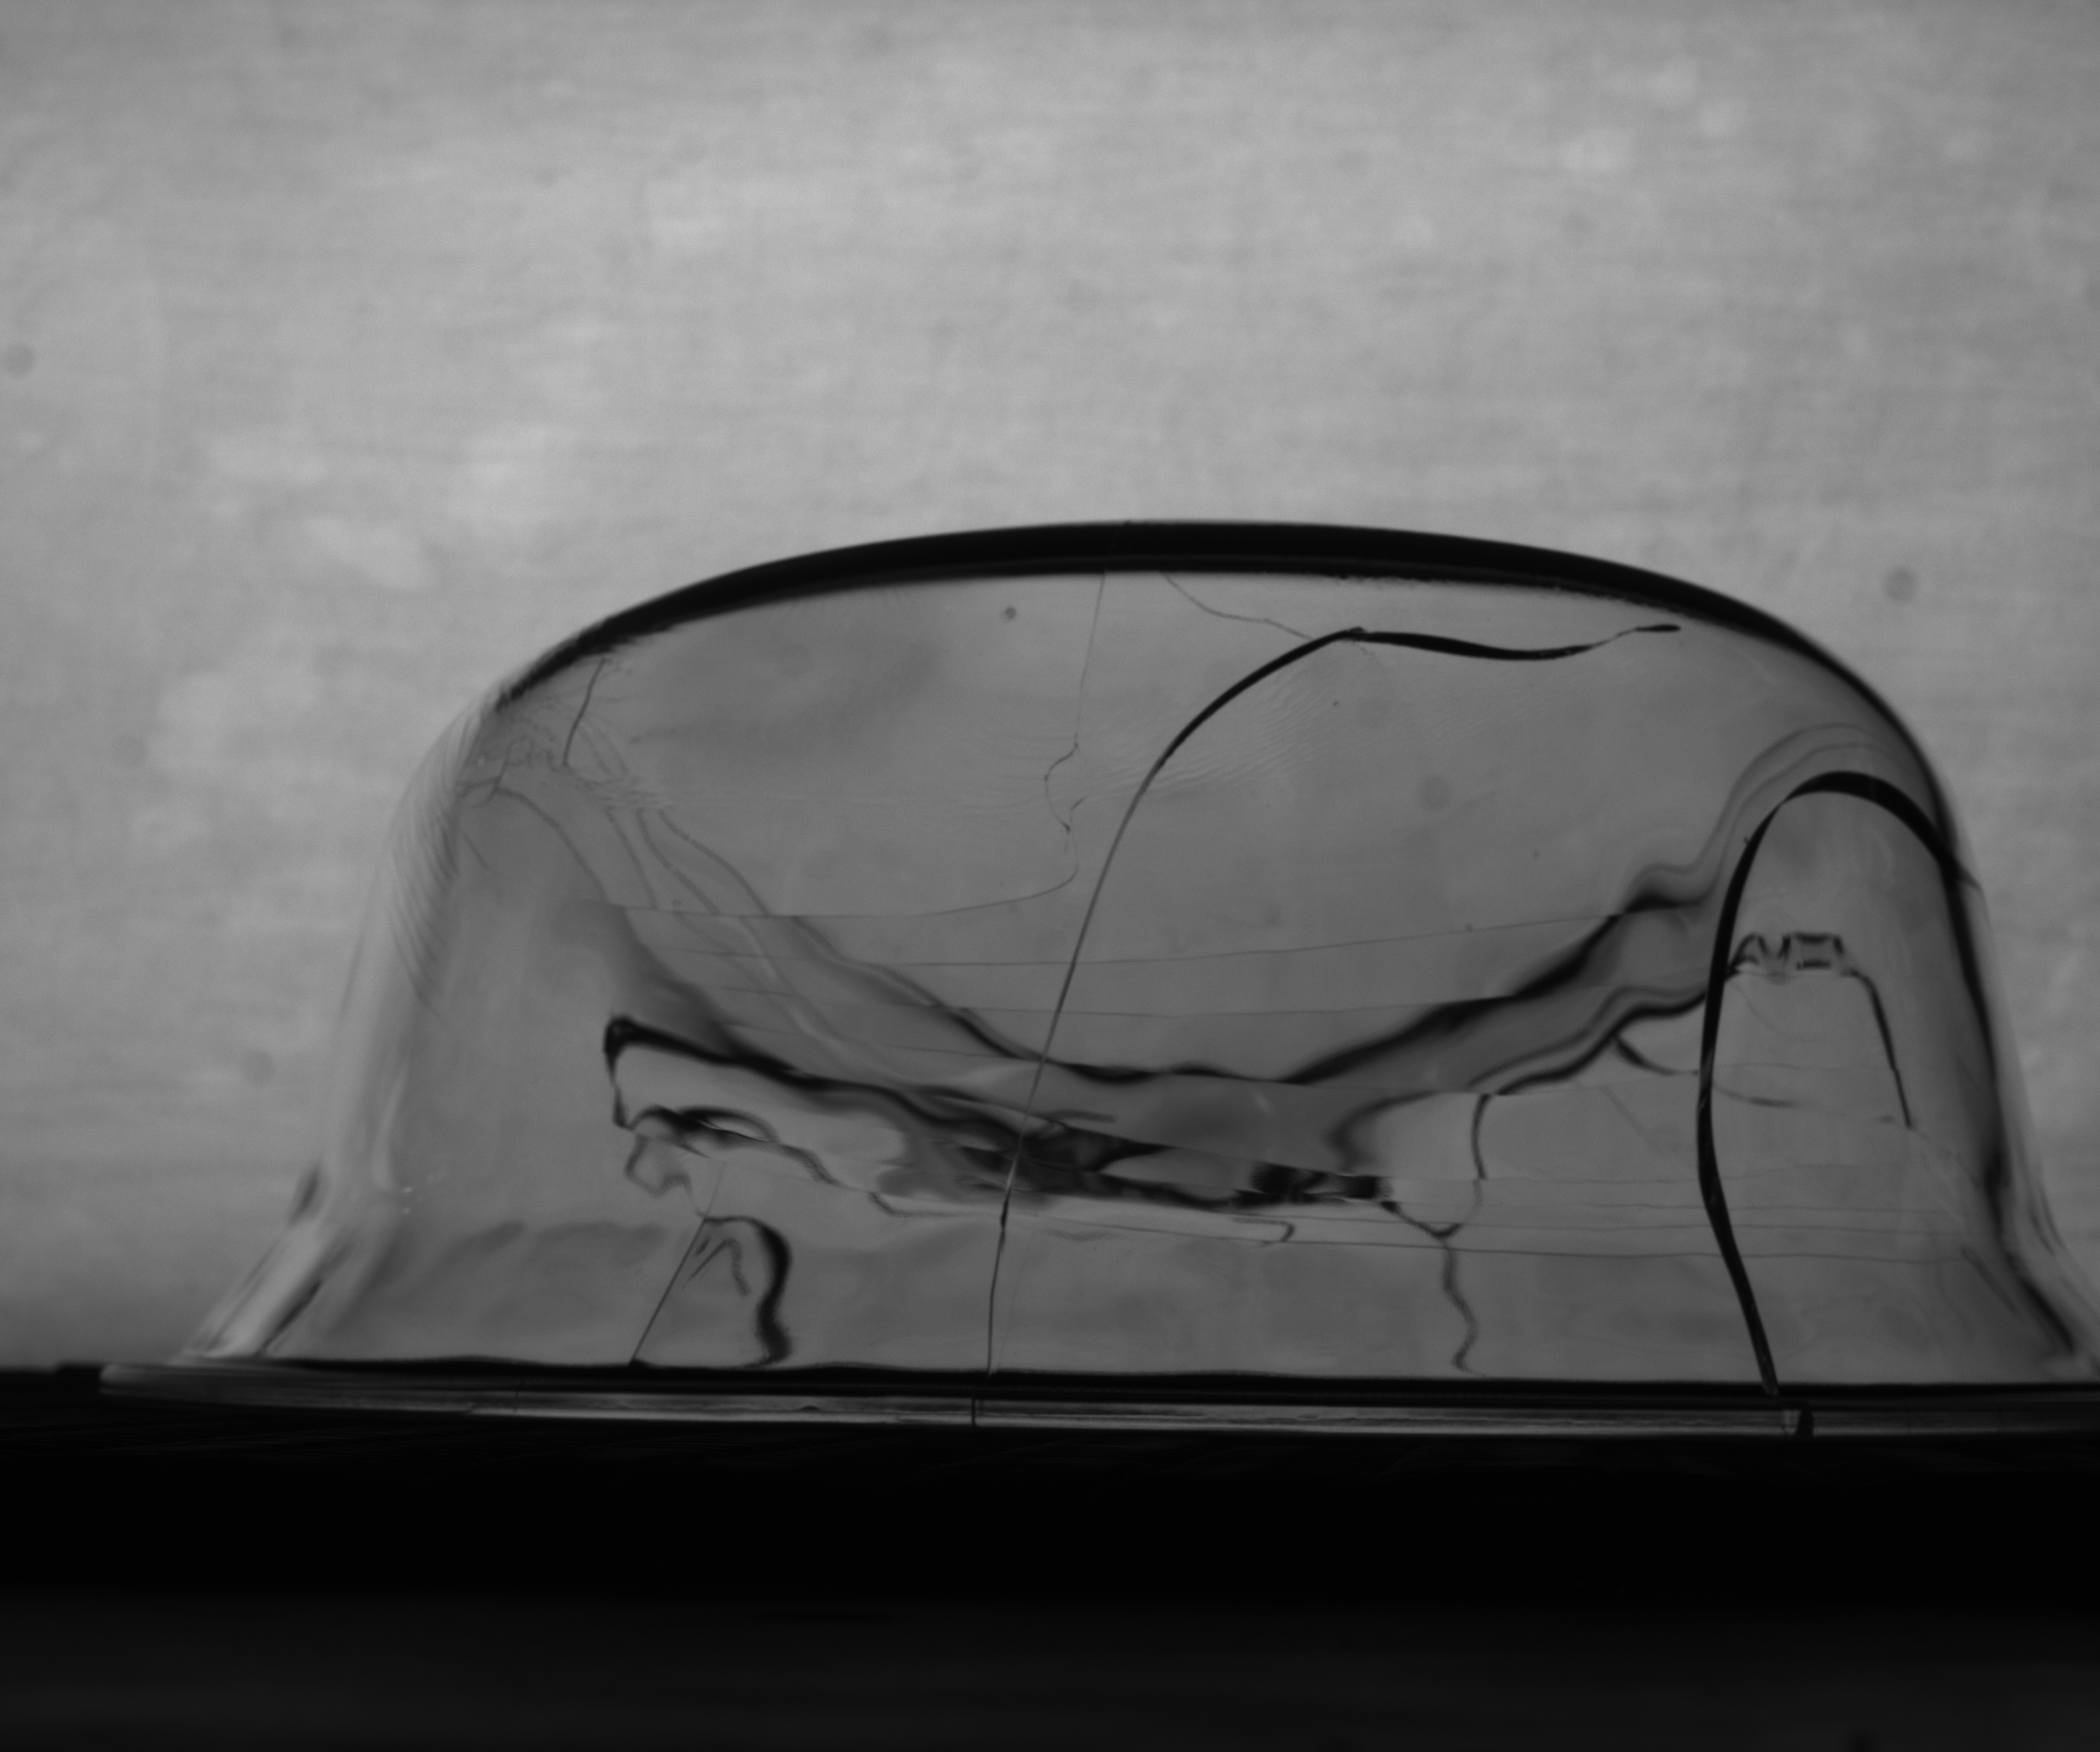

In [24]:
img = open_image(path/'21_2019_3_27_7_16_2_N_0.png')
img

In [25]:
learn = load_learner(path)

In [26]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category rotti

# Not bad!